In [206]:
import numpy as np
import json
import re
from konlpy.tag import Okt
from collections import Counter
from PIL import Image
from IPython.display import set_matplotlib_formats
from matplotlib import pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

### 한글 폰트

In [24]:
# 한글 폰트 확인
import matplotlib.font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXSizeThreeSym',
 'STIXGeneral',
 'STIXSizeFiveSym',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'cmmi10',
 'STIXNonUnicode',
 'cmex10',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'DejaVu Sans Display',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'cmtt10',
 'STIXGeneral',
 'DejaVu Serif Display',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'cmr10',
 'DejaVu Sans',
 'cmb10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'cmsy10',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'cmss10',
 'STIXSizeFourSym',
 'STIXGeneral',
 'DejaVu Serif',
 'Segoe UI',
 'MoeumT R',
 'Lucida Sans',
 'Nirmala UI',
 'HYPMokGak-Bold',
 'Cooper Black',
 'Myanmar Text',
 'Goudy Stout',
 'Courier New',
 'Segoe Print',
 'Impact',
 'Verdana',
 'Onyx',
 'Leelawadee UI',
 'Century Schoolbook',
 'MV Boli',
 'Footlight MT Light',
 'Segoe UI',
 'Old English Text MT',
 'Myanmar Text',
 'Pristina',
 'Freesty

In [207]:
path = '../visualization/data/MaruBuri-Regular.ttf'
fontprop = fm.FontProperties(fname=path)
set_matplotlib_formats('retina')

C:\Users\admin\AppData\Local\Temp\ipykernel_13500\2902273191.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


# 1. '부산교통공사 적자' 워드클라우드
- 상위 단어 200개 추출

### 전처리

In [275]:
# json 파일 불러오기
file_path = '../data/부산교통공사 적자_naver_news.json'
with open (file_path, 'rt', encoding='utf-8') as file: 
    loss = json.load(file)

print(loss)

[{'cnt': 1, 'description': '도시철도 <b>적자</b>와 손실을 감당하기에 이미 한계 수준에 이른 것이다. 지역별로 살펴보면, ▲서울<b>교통공사</b>의 손실액이 2021년 2,784억 원 ▲<b>부산교통공사</b> 1,090억 원, ▲대구도시철도<b>공사</b> 459억 원 ▲인천<b>교통공사</b> 240억 원... ', 'link': 'http://www.fntoday.co.kr/news/articleView.html?idxno=281672', 'originallink': 'http://www.fntoday.co.kr/news/articleView.html?idxno=281672', 'pDate': '2022-10-22 02:50:00', 'title': '작년 대구 지하철 무임승차 손실 459억원...운영손실 보전 위한 정부 지원 절...'}, {'cnt': 2, 'description': '도시철도 <b>적자</b>와 손실을 감당하기에 이미 한계 수준에 이른 것이다. 지역별로 살펴보면 ▲서울<b>교통공사</b>의 손실액이 지난해 2천784억 원 ▲<b>부산교통공사</b> 1천90억 원, ▲대구도시철도<b>공사</b> 459억 원 ▲인천<b>교통공사</b> 240억 원... ', 'link': 'http://www.namdonews.com/news/articleView.html?idxno=699745', 'originallink': 'http://www.namdonews.com/news/articleView.html?idxno=699745', 'pDate': '2022-10-20 19:08:00', 'title': '광주 지하철 무임승차 손실 64억원'}, {'cnt': 3, 'description': '도시철도 <b>적자</b>와 손실을 감당하기에 이미 한계 수준에 이른 것이다. 지역별로 살펴보면, △서울<b>교통공사</b>의 손실액이 2021년 2,784억 원 △<b>부산교통공사</b> 1,090억 원, △대구도시철도<b>공사

In [ ]:
ex1) [{'cnt': 1, 'description': '도시철도 <b>적자</b>와 손실을 감당하기에 이미 한계 수준에 이른 것이다. 지역별로 살펴보면, ▲서울<b>교통공사</b>의 손실액이 2021년 2,784억 원 ▲<b>부산교통공사</b> 1,090억 원, ▲대구도시철도<b>공사</b> 459억 원 ▲인천<b>교통공사</b> 240억 원... ', 'link': 'http://www.fntoday.co.kr/news/articleView.html?idxno=281672', 'originallink': 'http://www.fntoday.co.kr/news/articleView.html?idxno=281672', 'pDate': '2022-10-22 02:50:00', 'title': '작년 대구 지하철 무임승차 손실 459억원...운영손실 보전 위한 정부 지원 절...'}

In [276]:
# data['title'] 명사인 단어만 추출
title1 = ''
for news in loss : 
    title1 = title1 + re.sub(r'[^\w]', ' ', news['title'])

title1

'작년 대구 지하철 무임승차 손실 459억원   운영손실 보전 위한 정부 지원 절   광주 지하철 무임승차 손실 64억원지난해 대구 지하철 무임승차 손실 459억2021년 대구 지하철 무임승차 손실 459억원작년 대구 도시철도 손실액 459억조명희 의원  대구 지하철 459억원  운영손실 절실대구 도시철도 지난해 무임승차 손실 459억 b 부산  b 도시철도 파업으로 치닫나  노사  29일 최종 교섭 b 부산  b 도시철도역 63    나 홀로 순찰   폭력 무방비 노출지난해  b 부산  b  지하철 무임승차 손실 1090억원  b 적자  b 의 56  b 부산  b 시 공공기관 구조조정 추진 노조   b 적자  b  누명 씌우려 한다  quot 더욱 은밀해진 윤 정부    새로운 노동담론 필요 quot  위클립  5월 4주김영진  b 부산  b 시장 후보   apos 대중 b 교통  b 체계전환 위한 3당 협의체 apos  제안 b 부산  b 도시철도  apos 재정지원금 상한제 apos  폐지 촉구 quot  b 부산  b 시  재정지원금 상한제로 부채 돌려막기    성과급 챙겨 quot  quot  b 부산  b 지하철 지원금 상한제는 부채 돌려막기 즉각 폐지해야 quot  b 부산  b  NGO  quot 도시철도 재정지원금 상한제 폐지해야 quot 시민대책위   부채 돌려막기  도시철도 재정지원금 상한제 폐지 촉구 b 부산  b    b 적자  b 보전 대신  apos 1천억 apos  빚    예산 절감 맞나 달리는  apos  b 적자  b  apos 철도    부채 돌려막기   앵커  R  b 적자  b 보전 대신  apos 1천억 apos  빚    예산 절감 맞나  quot 노노갈등 부추기는 행안부 평가급 차등 확대 철회하라 quot  quot 무임승차 손실  정부가 부담을 quot  13개 지자체 공동 건의도시철도 양산선  b 공사  b  늦어져 개통 지연 우려 팩트체크  새 정부에선 노인 지하철 무임승차 혜택 줄어든다 도시철도 법정 무임승

In [277]:
# 명사만 추출
# 단어 분해 심각 Okt -> ckonlpy
nlp1 = Okt()
title1_noun = nlp1.nouns(title1)

title1_noun

['작년',
 '대구',
 '지하철',
 '무임',
 '승차',
 '손실',
 '운영',
 '손실',
 '보전',
 '위',
 '정부',
 '지원',
 '절',
 '광주',
 '지하철',
 '무임',
 '승차',
 '손실',
 '대구',
 '지하철',
 '무임',
 '승차',
 '손실',
 '대구',
 '지하철',
 '무임',
 '승차',
 '손실',
 '대구',
 '도시철도',
 '손실',
 '액',
 '의원',
 '대구',
 '지하철',
 '운영',
 '손실',
 '절실',
 '대구',
 '도시철도',
 '지난해',
 '무임',
 '승차',
 '손실',
 '부산',
 '도시철도',
 '파업',
 '노사',
 '최종',
 '교섭',
 '부산',
 '도시철도역',
 '나',
 '홀로',
 '순찰',
 '폭력',
 '무방비',
 '노출',
 '지난해',
 '부산',
 '지하철',
 '무임',
 '승차',
 '손실',
 '적자',
 '의',
 '부산',
 '시',
 '공공기관',
 '구조조정',
 '추진',
 '노조',
 '적자',
 '누명',
 '더욱',
 '은밀',
 '윤',
 '정부',
 '노동',
 '담론',
 '필요',
 '위',
 '클립',
 '김영진',
 '부산',
 '시장',
 '후보',
 '대중',
 '교통',
 '체계',
 '전환',
 '위',
 '당',
 '협의',
 '체',
 '제안',
 '부산',
 '도시철도',
 '재정',
 '원금',
 '상한',
 '제',
 '폐지',
 '촉구',
 '부산',
 '시',
 '재정',
 '원금',
 '상한',
 '제로',
 '부채',
 '돌려막기',
 '성과급',
 '부산',
 '지하철',
 '원금',
 '상한',
 '제',
 '부채',
 '돌려막기',
 '즉각',
 '폐지',
 '부산',
 '도시철도',
 '재정',
 '원금',
 '상한',
 '제',
 '폐지',
 '시민',
 '대책위',
 '부채',
 '돌려막기',
 '도시철도',
 '재정',
 '원금',
 '상한',
 '제',
 '폐지',
 '촉구'

In [278]:
# 추출한 단어로 검색
count1 = Counter(title1_noun)

count1

Counter({'작년': 21,
         '대구': 16,
         '지하철': 240,
         '무임': 164,
         '승차': 104,
         '손실': 106,
         '운영': 31,
         '보전': 38,
         '위': 24,
         '정부': 42,
         '지원': 66,
         '절': 1,
         '광주': 2,
         '도시철도': 247,
         '액': 20,
         '의원': 8,
         '절실': 6,
         '지난해': 16,
         '부산': 623,
         '파업': 105,
         '노사': 48,
         '최종': 2,
         '교섭': 6,
         '도시철도역': 2,
         '나': 6,
         '홀로': 2,
         '순찰': 1,
         '폭력': 1,
         '무방비': 1,
         '노출': 1,
         '적자': 151,
         '의': 9,
         '시': 103,
         '공공기관': 19,
         '구조조정': 10,
         '추진': 24,
         '노조': 95,
         '누명': 1,
         '더욱': 1,
         '은밀': 1,
         '윤': 1,
         '노동': 6,
         '담론': 1,
         '필요': 6,
         '클립': 1,
         '김영진': 1,
         '시장': 33,
         '후보': 7,
         '대중': 11,
         '교통': 245,
         '체계': 4,
         '전환': 3,
         '당': 1,
     

In [279]:
# 추출한 단어 전체 갯수
print(len(count1))

1533


In [280]:
# count 갯수대로 정렬 후 100개 추출 -> 80개 추출
word_count1 = dict()

for tag, counts in count1.most_common(200) : 
    if len(str(tag)) > 1 : 
        word_count1[tag] = counts
        print(f'{tag} : {counts}')

부산 : 623
공사 : 295
도시철도 : 247
교통 : 245
지하철 : 240
무임 : 164
적자 : 151
공기업 : 129
손실 : 106
파업 : 105
승차 : 104
지방 : 97
노조 : 95
지원 : 66
경영 : 66
사장 : 61
도시 : 60
국비 : 55
전국 : 54
노사 : 48
정부 : 42
수송 : 40
서울 : 39
보전 : 38
안전 : 37
비용 : 35
혁신 : 34
시장 : 33
사설 : 33
부채 : 32
운영 : 31
평가 : 31
기관 : 31
시민 : 26
요금 : 26
인상 : 26
추진 : 24
성과급 : 24
돌입 : 24
경전철 : 24
호선 : 23
임금 : 22
최고 : 22
작년 : 21
임명 : 21
예산 : 20
공공기관 : 19
노인 : 19
개선 : 19
의회 : 19
규모 : 19
연봉 : 19
김해 : 18
재정 : 17
촉구 : 17
오거돈 : 17
전동차 : 17
대구 : 16
지난해 : 16
부담 : 16
사고 : 16
국가 : 16
증가 : 16
노후 : 16
논란 : 16
개발 : 15
잔치 : 15
가결 : 15
협상 : 15
확대 : 14
만성 : 14
총파업 : 14
공단 : 14
박종흠 : 14
위기 : 13
직원 : 13
확보 : 13
더미 : 13
운행 : 13
승객 : 12
종합 : 12
사업 : 12
발표 : 12
인력 : 12
대중 : 11
우려 : 11
시설 : 11
대표 : 11
주요 : 11
투표 : 11
쟁의 : 11
행위 : 11
서울시 : 11
이용 : 11
장기 : 11
구조조정 : 10
갈등 : 10
지자체 : 10
건의 : 10
이름 : 10
결렬 : 10
방만 : 10
대책 : 10
기고 : 10
교체 : 10
정상 : 10
성적 : 10
폐지 : 9
철도 : 9
철회 : 9
공동 : 9
출근길 : 9
무료 : 9
채택 : 9
과제 : 9
이종국 : 9
선임 : 9
위해 : 9
계획 : 9
찬성 : 9
코로나 : 9
문제 : 9
채용 : 9
정

In [21]:
# 키워드 수치 수정
word_count1['부산'] = 623

In [43]:
# 전체 키워드 확인
word_count1

{'부산': 623,
 '공사': 295,
 '도시철도': 247,
 '교통': 245,
 '지하철': 240,
 '무임': 164,
 '적자': 151,
 '공기업': 129,
 '손실': 106,
 '파업': 105,
 '승차': 104,
 '지방': 97,
 '노조': 95,
 '지원': 66,
 '경영': 66,
 '사장': 61,
 '도시': 60,
 '국비': 55,
 '전국': 54,
 '노사': 48,
 '정부': 42,
 '수송': 40,
 '서울': 39,
 '보전': 38,
 '안전': 37,
 '비용': 35,
 '혁신': 34,
 '시장': 33,
 '사설': 33,
 '부채': 32,
 '운영': 31,
 '평가': 31,
 '기관': 31,
 '시민': 26,
 '요금': 26,
 '인상': 26,
 '추진': 24,
 '성과급': 24,
 '돌입': 24,
 '경전철': 24,
 '호선': 23,
 '임금': 22,
 '최고': 22,
 '작년': 21,
 '임명': 21,
 '예산': 20,
 '공공기관': 19,
 '노인': 19,
 '개선': 19,
 '의회': 19,
 '규모': 19,
 '연봉': 19,
 '김해': 18,
 '재정': 17,
 '촉구': 17,
 '오거돈': 17,
 '전동차': 17,
 '대구': 16,
 '지난해': 16,
 '부담': 16,
 '사고': 16,
 '국가': 16,
 '증가': 16,
 '노후': 16,
 '논란': 16,
 '개발': 15,
 '잔치': 15,
 '가결': 15,
 '협상': 15}

### 워드클라우드

In [281]:
# 워드클라우드 배경 설정
# 투명 배경임에도 아이콘 안에만 워드클라우드 넣기 안됨 -> 그림 배열의 색 변경
mask1 = Image.new('RGBA', (404, 494), (255, 255, 255))
image1 = Image.open('../visualization/data/subwayIcon.png').convert('RGBA')
x, y = image1.size
mask1.paste(image1, (0, 0, x, y), image1)
mask1 = mask1.resize((1010, 1235)) # 원래 이미지 작아서 워드클라우드 글씨 깨짐 * 2.5
mask1 = np.array(mask1)


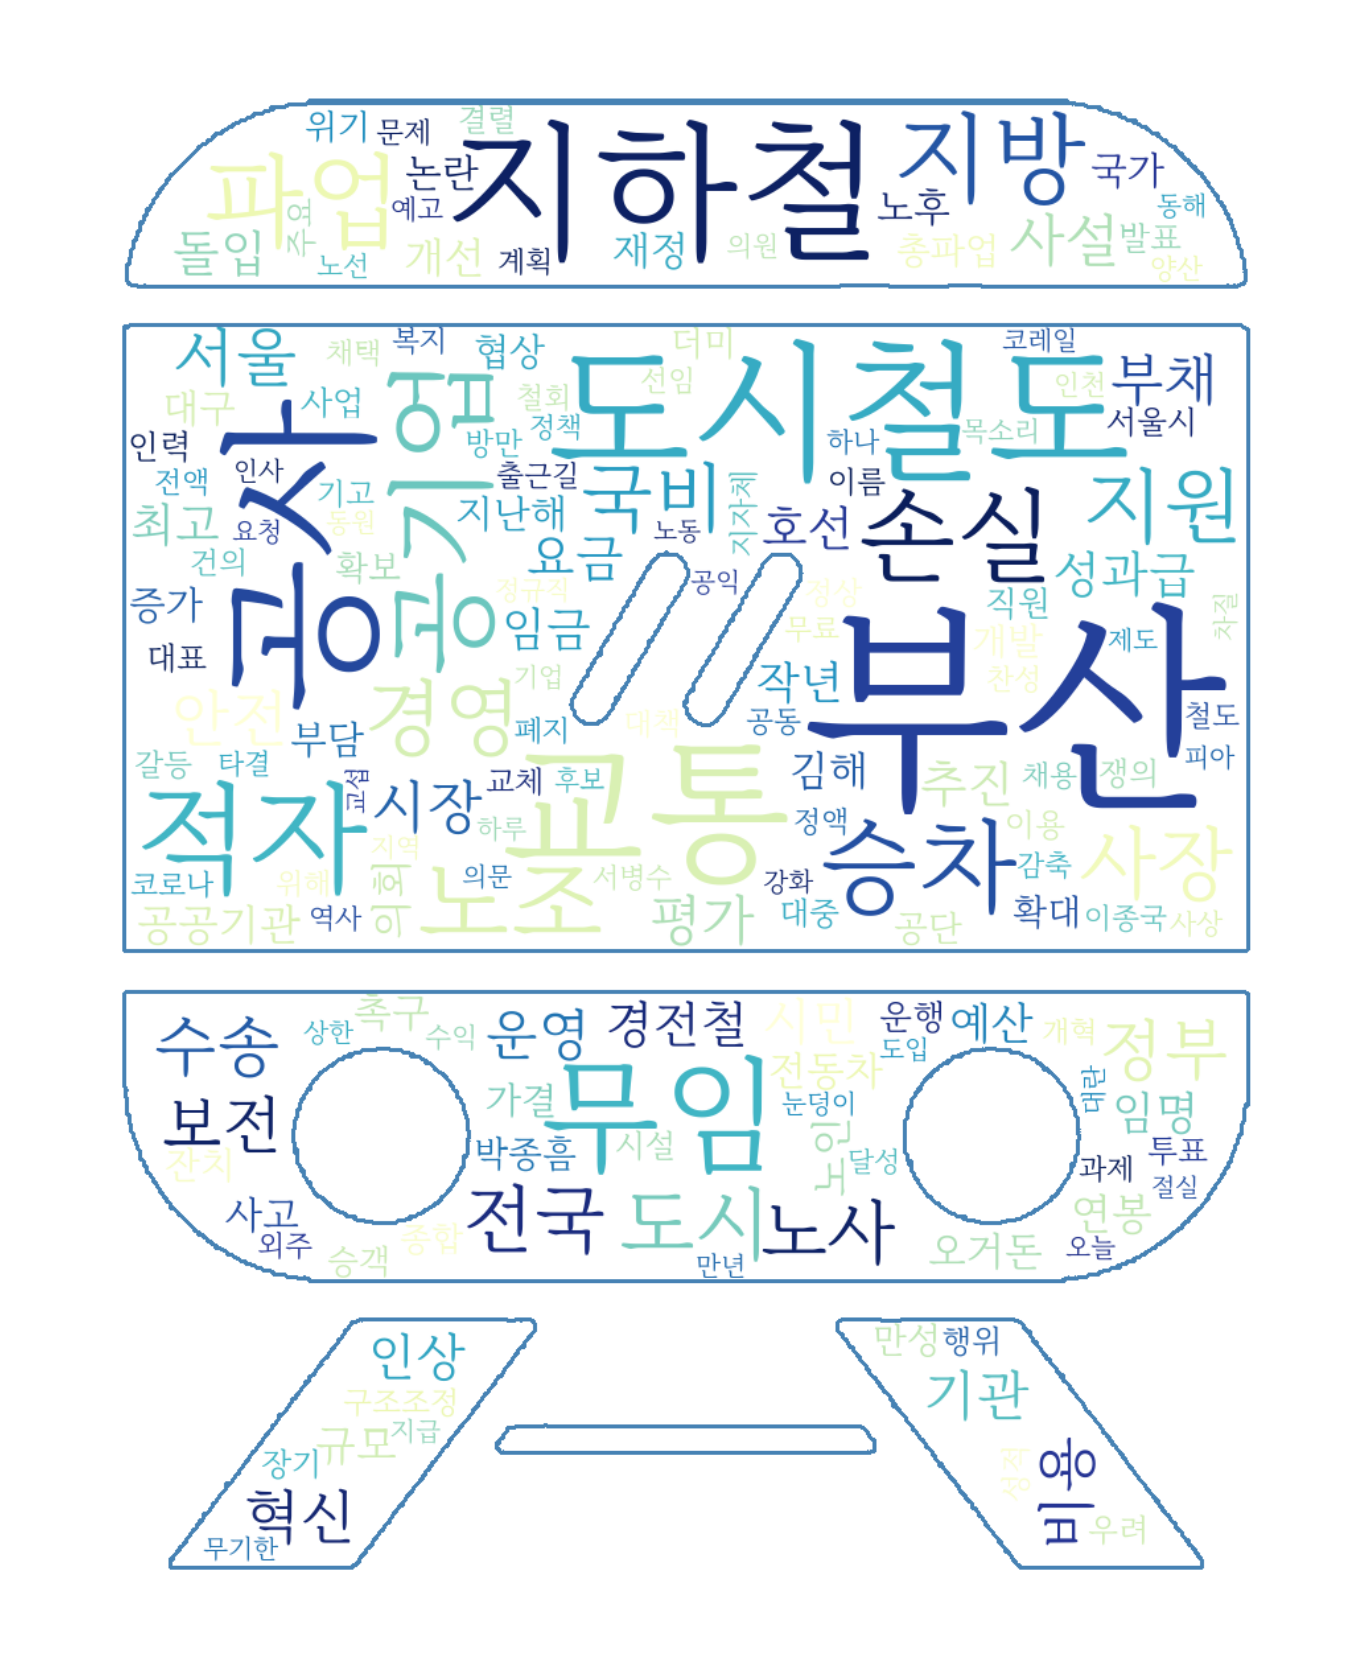

In [282]:
# 워드클라우드 출력
# 그림 티가 안나서 라인 추가
# 그림 안에 키워드가 적게 들어가서 키워드 양 80 -> 200 늘림
wc_loss = WordCloud(font_path=path, mask = mask1, contour_width=2, contour_color='steelblue', background_color='white', colormap ='YlGnBu')
cloud_loss = wc_loss.generate_from_frequencies(word_count1)

plt.figure(figsize=(40,15))
plt.imshow(cloud_loss, interpolation='bilinear')
plt.axis('off')
plt.show()


# 2. '지하상가 공실률' 워드클라우드
- 상위 단어 200개 추출

### 전처리

In [283]:
# json 파일 불러오기
file_path = '../data/지하상가 공실률_naver_news.json'
with open (file_path, 'rt', encoding='utf-8') as file: 
    empty = json.load(file)

print(empty)

[{'cnt': 1, 'description': '경기 침체가 장기화되면서 <b>상가</b>들이 줄지어 폐업하고, <b>공실률</b>이 해마다 치솟으며 속절없이 무너지고 있는... 금남·충금 <b>지하상가</b>를 입체적으로 융합, 문화와 예술이 숨 쉬는 상권 조성에 나선 점이다. 구도심... ', 'link': 'http://www.kwangju.co.kr/article.php?aid=1666710300744845074', 'originallink': 'http://www.kwangju.co.kr/article.php?aid=1666710300744845074', 'pDate': '2022-10-26 00:06:00', 'title': '속절없이 무너지는 구도심 상권, 활성화 지원을'}, {'cnt': 2, 'description': '24일 한국부동산원에 따르면 올 2분기 기준 충장로·금남로 지역 중대형매장 <b>공실률</b>은 25.8%로 조사됐다. 4곳... 금남·충금<b>지하상가</b>를 <b>지하</b>와 지상을 잇는 입체 <b>상가</b>로 융합해 도심 상권 활성화에 나서기로 한 점에... ', 'link': 'http://www.kwangju.co.kr/article.php?aid=1666606740744801005', 'originallink': 'http://www.kwangju.co.kr/article.php?aid=1666606740744801005', 'pDate': '2022-10-24 19:20:00', 'title': '광주 중심 상권 ‘충장로·금남로의 눈물’'}, {'cnt': 3, 'description': '앞서 김영환 지사는 <b>지하상가</b>의 모든 점포가 영업을 포기해 <b>공실률</b> 100%에 달하자 이를 활용할 방안을 강구하라고 주문했다. 이에 충북개발공사는 이곳에 자하차도를 개통하고, 지상 부분은 공원으로 만들어 성안길 등... ', 'link': 'https://n.news.naver.com/mnews/art

In [ ]:
ex1) {'cnt': 1, 'description': '경기 침체가 장기화되면서 <b>상가</b>들이 줄지어 폐업하고, <b>공실률</b>이 해마다 치솟으며 속절없이 무너지고 있는... 금남·충금 <b>지하상가</b>를 입체적으로 융합, 문화와 예술이 숨 쉬는 상권 조성에 나선 점이다. 구도심... ', 'link': 'http://www.kwangju.co.kr/article.php?aid=1666710300744845074', 'originallink': 'http://www.kwangju.co.kr/article.php?aid=1666710300744845074', 'pDate': '2022-10-26 00:06:00', 'title': '속절없이 무너지는 구도심 상권, 활성화 지원을'}

In [284]:
# data2['title'] 명사인 단어만 추출
title2 = ''
for news in empty : 
    title2 = title2 + re.sub(r'[^\w]', ' ', news['title'])

title2

'속절없이 무너지는 구도심 상권  활성화 지원을광주 중심 상권  충장로 금남로의 눈물  b 공실률  b  100  청주  b 지하상가  b   apos  b 지하  b 차도로 변하나  상부도로는 공원으로 핵심 상권 주간 리포트명동의 랜드마크 쇼핑몰  눈스퀘어  새단장 오픈 현장  코로나 직격탄 맞았던 K 뷰티 성지  apos 명동 apos   엔데믹 이후 상황은 레이크파크 명품도로 대현 b 지하상가  b  등 이슈 반영 돋보여 MS투데이 사설   apos 명동 apos  상인 피눈물  누가 닦아주나청주 상권 이끌던  대현 b 지하상가  b  의 몰락  35년만에 100  공실 충청브리핑   정말 세다  5일 역대급  힌남노  상륙  폭풍 전야 청주 상권 이끌던 대현 b 지하상가  b  몰락 apos  b 공실률  b  100  apos  청주 대현 b 지하상가  b  결국  35년만에 운영 중단청주 상권 이끌었던 대현 b 지하상가  b  몰락  b 공실률  b  100  운영 중단 apos 유령 b 상가  b  apos 된 청주  b 지하상가  b   모든 점포 철수 apos 어르신 아동 매칭 책 읽어주기 apos  도입 검토 탈서울  인지방⑤  혁신도시 시즌2  지역 내 상생발전과 공공기관 추가 이전    기자수첩  아웃렛 입점에 시민 대부분은 찬성한다  하지만 점포 합쳐 고객 유치  위기의  b 지하상가  b  돌파구 될까충청 상업용 부동산 시장  apos 위축 apos   b 공실률  b  전국 평균 웃돌아 르포 젊은이 핫플 충장로도 곳곳  apos 임대 apos  딱지  quot 상권 다 죽었다 quot 충북 소비심리 급랭   1년 5개월 만에 최저 기자수첩  부동산 경매 망하지 않으려면 apos 코로나 회복에도    apos  금남로 전남대 후문 빈 점포 잇따라 quot 외국인 관광객 다시 온다 quot  기대감 부푼 명동 이태원 상인들2년새 빈 점포 급증한 부산 남포동 활기 되찾을까 quot 방치된 공공부지 공유재산 적극 활용해야 quot  천지포토

In [285]:
# 명사만 추출
# 단어 분해 심각 Okt -> ckonlpy
nlp2 = Okt()
title2_noun = nlp2.nouns(title2)

title2_noun

['도심',
 '상권',
 '활성화',
 '지원',
 '광주',
 '중심',
 '상권',
 '충장로',
 '금남로',
 '눈물',
 '실률',
 '청주',
 '지하상가',
 '지하',
 '차도',
 '상부',
 '도로',
 '공원',
 '핵심',
 '상권',
 '주간',
 '리포트',
 '명동',
 '랜드마크',
 '쇼핑몰',
 '눈',
 '스퀘어',
 '단장',
 '오픈',
 '현장',
 '코로나',
 '직격탄',
 '뷰티',
 '성지',
 '명동',
 '엔데믹',
 '이후',
 '상황',
 '레이크',
 '파크',
 '명품',
 '도로',
 '대현',
 '지하상가',
 '등',
 '이슈',
 '반영',
 '투데이',
 '사설',
 '명동',
 '상인',
 '피',
 '눈물',
 '누가',
 '청주',
 '상권',
 '대현',
 '지하상가',
 '의',
 '몰락',
 '실',
 '충청',
 '브리핑',
 '정말',
 '역대',
 '힌남노',
 '상륙',
 '폭풍',
 '전야',
 '청주',
 '상권',
 '대현',
 '지하상가',
 '몰락',
 '실률',
 '청주',
 '대현',
 '지하상가',
 '운영',
 '중단',
 '청주',
 '상권',
 '대현',
 '지하상가',
 '몰락',
 '실률',
 '운영',
 '중단',
 '유령',
 '상가',
 '청주',
 '지하상가',
 '모든',
 '점포',
 '철수',
 '어르신',
 '아동',
 '매칭',
 '책',
 '도입',
 '검토',
 '탈',
 '서울',
 '인',
 '지방',
 '혁신도시',
 '시즌',
 '지역',
 '내',
 '상생',
 '발전',
 '공공기관',
 '추가',
 '이전',
 '기자',
 '수첩',
 '아웃렛',
 '입점',
 '시민',
 '대부분',
 '찬성',
 '점포',
 '고객',
 '유치',
 '위기',
 '지하상가',
 '돌파구',
 '충청',
 '상업',
 '용',
 '부동산',
 '시장',
 '위축',
 '실률',
 '전국',
 '평균',
 '웃',
 '르포',
 '젊은이

In [287]:
# 추출한 단어로 검색
count2 = Counter(title2_noun)

count2

Counter({'도심': 20,
         '상권': 67,
         '활성화': 8,
         '지원': 6,
         '광주': 7,
         '중심': 10,
         '충장로': 4,
         '금남로': 3,
         '눈물': 3,
         '실률': 38,
         '청주': 22,
         '지하상가': 83,
         '지하': 37,
         '차도': 1,
         '상부': 1,
         '도로': 3,
         '공원': 1,
         '핵심': 11,
         '주간': 4,
         '리포트': 12,
         '명동': 10,
         '랜드마크': 17,
         '쇼핑몰': 3,
         '눈': 3,
         '스퀘어': 4,
         '단장': 2,
         '오픈': 6,
         '현장': 8,
         '코로나': 20,
         '직격탄': 3,
         '뷰티': 1,
         '성지': 1,
         '엔데믹': 1,
         '이후': 3,
         '상황': 2,
         '레이크': 1,
         '파크': 3,
         '명품': 1,
         '대현': 12,
         '등': 4,
         '이슈': 3,
         '반영': 2,
         '투데이': 2,
         '사설': 1,
         '상인': 10,
         '피': 3,
         '누가': 2,
         '의': 9,
         '몰락': 5,
         '실': 21,
         '충청': 5,
         '브리핑': 6,
         '정말': 2,
         '역대': 1,
  

In [288]:
# 추출한 단어 전체 갯수
print(len(count2))

1172


In [289]:
# count 갯수대로 정렬 후 100개 추출 -> 80개 추출
word_count2 = dict()

for tag, counts in count2.most_common(200) : 
    if len(str(tag)) > 1 : 
        word_count2[tag] = counts
        print(f'{tag} : {counts}')

부평역 : 111
상가 : 86
지하상가 : 83
프라이 : 78
디움 : 78
빌딩 : 73
매각 : 73
상권 : 67
추진 : 40
실률 : 38
시티 : 38
지하 : 37
한세상 : 37
일괄 : 30
부평 : 29
부산 : 27
점포 : 26
오피스 : 26
오피스텔 : 26
서울 : 25
인천 : 25
계획 : 24
분양 : 23
청주 : 22
투자 : 21
도심 : 20
코로나 : 20
임대료 : 20
주목 : 20
임대 : 18
의원 : 18
시설 : 18
랜드마크 : 17
경쟁 : 17
광복 : 17
부동산 : 16
입찰 : 16
관심 : 14
제한 : 14
청년 : 13
대전 : 13
롯데 : 13
리포트 : 12
대현 : 12
시장 : 12
관리 : 12
중앙 : 12
춘천 : 12
섹션 : 12
수요 : 12
핵심 : 11
지역 : 11
증가 : 11
집중 : 11
삼성 : 11
중심 : 10
명동 : 10
상인 : 10
청주시 : 10
폐업 : 10
김성택 : 10
대구 : 10
침체 : 10
매출 : 10
서울시 : 10
수익률 : 10
수익 : 10
위기 : 9
르포 : 9
텅텅 : 9
진주 : 9
직통 : 9
대형 : 9
진행 : 9
활성화 : 8
현장 : 8
공단 : 8
건물 : 8
사무실 : 8
눈길 : 8
사옥 : 8
신축 : 8
광주 : 7
운영 : 7
활용 : 7
위탁 : 7
대책 : 7
박용 : 7
중구청 : 7
모두 : 7
천안역 : 7
인기 : 7
복합 : 7
단지 : 7
진주시 : 7
가두 : 7
문화 : 7
효과 : 7
임차 : 7
부활 : 7
지원 : 6
오픈 : 6
브리핑 : 6
시민 : 6
경매 : 6
사업 : 6
동성로 : 6
장사 : 6
신년사 : 6
프리미엄 : 6
영등포 : 6
일대 : 6
권리금 : 6
도시 : 6
거리 : 6
에나 : 6
업무 : 6
연결 : 6
몰락 : 5
충청 : 5
상업 : 5
전국 : 5
급증 : 5
방안 : 5
중구 : 5
서면 : 5
희소성 : 5
트리플 : 5
인하 :

In [ ]:
# 키워드 수치 수정
word_count2['부산'] = 623

In [ ]:
# 전체 키워드 확인
word_count2

{'부산': 623,
 '공사': 295,
 '도시철도': 247,
 '교통': 245,
 '지하철': 240,
 '무임': 164,
 '적자': 151,
 '공기업': 129,
 '손실': 106,
 '파업': 105,
 '승차': 104,
 '지방': 97,
 '노조': 95,
 '지원': 66,
 '경영': 66,
 '사장': 61,
 '도시': 60,
 '국비': 55,
 '전국': 54,
 '노사': 48,
 '정부': 42,
 '수송': 40,
 '서울': 39,
 '보전': 38,
 '안전': 37,
 '비용': 35,
 '혁신': 34,
 '시장': 33,
 '사설': 33,
 '부채': 32,
 '운영': 31,
 '평가': 31,
 '기관': 31,
 '시민': 26,
 '요금': 26,
 '인상': 26,
 '추진': 24,
 '성과급': 24,
 '돌입': 24,
 '경전철': 24,
 '호선': 23,
 '임금': 22,
 '최고': 22,
 '작년': 21,
 '임명': 21,
 '예산': 20,
 '공공기관': 19,
 '노인': 19,
 '개선': 19,
 '의회': 19,
 '규모': 19,
 '연봉': 19,
 '김해': 18,
 '재정': 17,
 '촉구': 17,
 '오거돈': 17,
 '전동차': 17,
 '대구': 16,
 '지난해': 16,
 '부담': 16,
 '사고': 16,
 '국가': 16,
 '증가': 16,
 '노후': 16,
 '논란': 16,
 '개발': 15,
 '잔치': 15,
 '가결': 15,
 '협상': 15}

### 워드클라우드

In [292]:
# 워드클라우드 배경 설정
# 투명 배경임에도 아이콘 안에만 워드클라우드 넣기 안됨 -> 그림 배열의 색 변경
mask2 = Image.new('RGBA', (404, 494), (255, 255, 255))
image2 = Image.open('../visualization/data/subwayIcon.png').convert('RGBA')
x, y = image2.size
mask2.paste(image2, (0, 0, x, y), image2)
mask2 = mask2.resize((1010, 1235)) # 원래 이미지 작아서 워드클라우드 글씨 깨짐 * 2.5
mask2 = np.array(mask2)


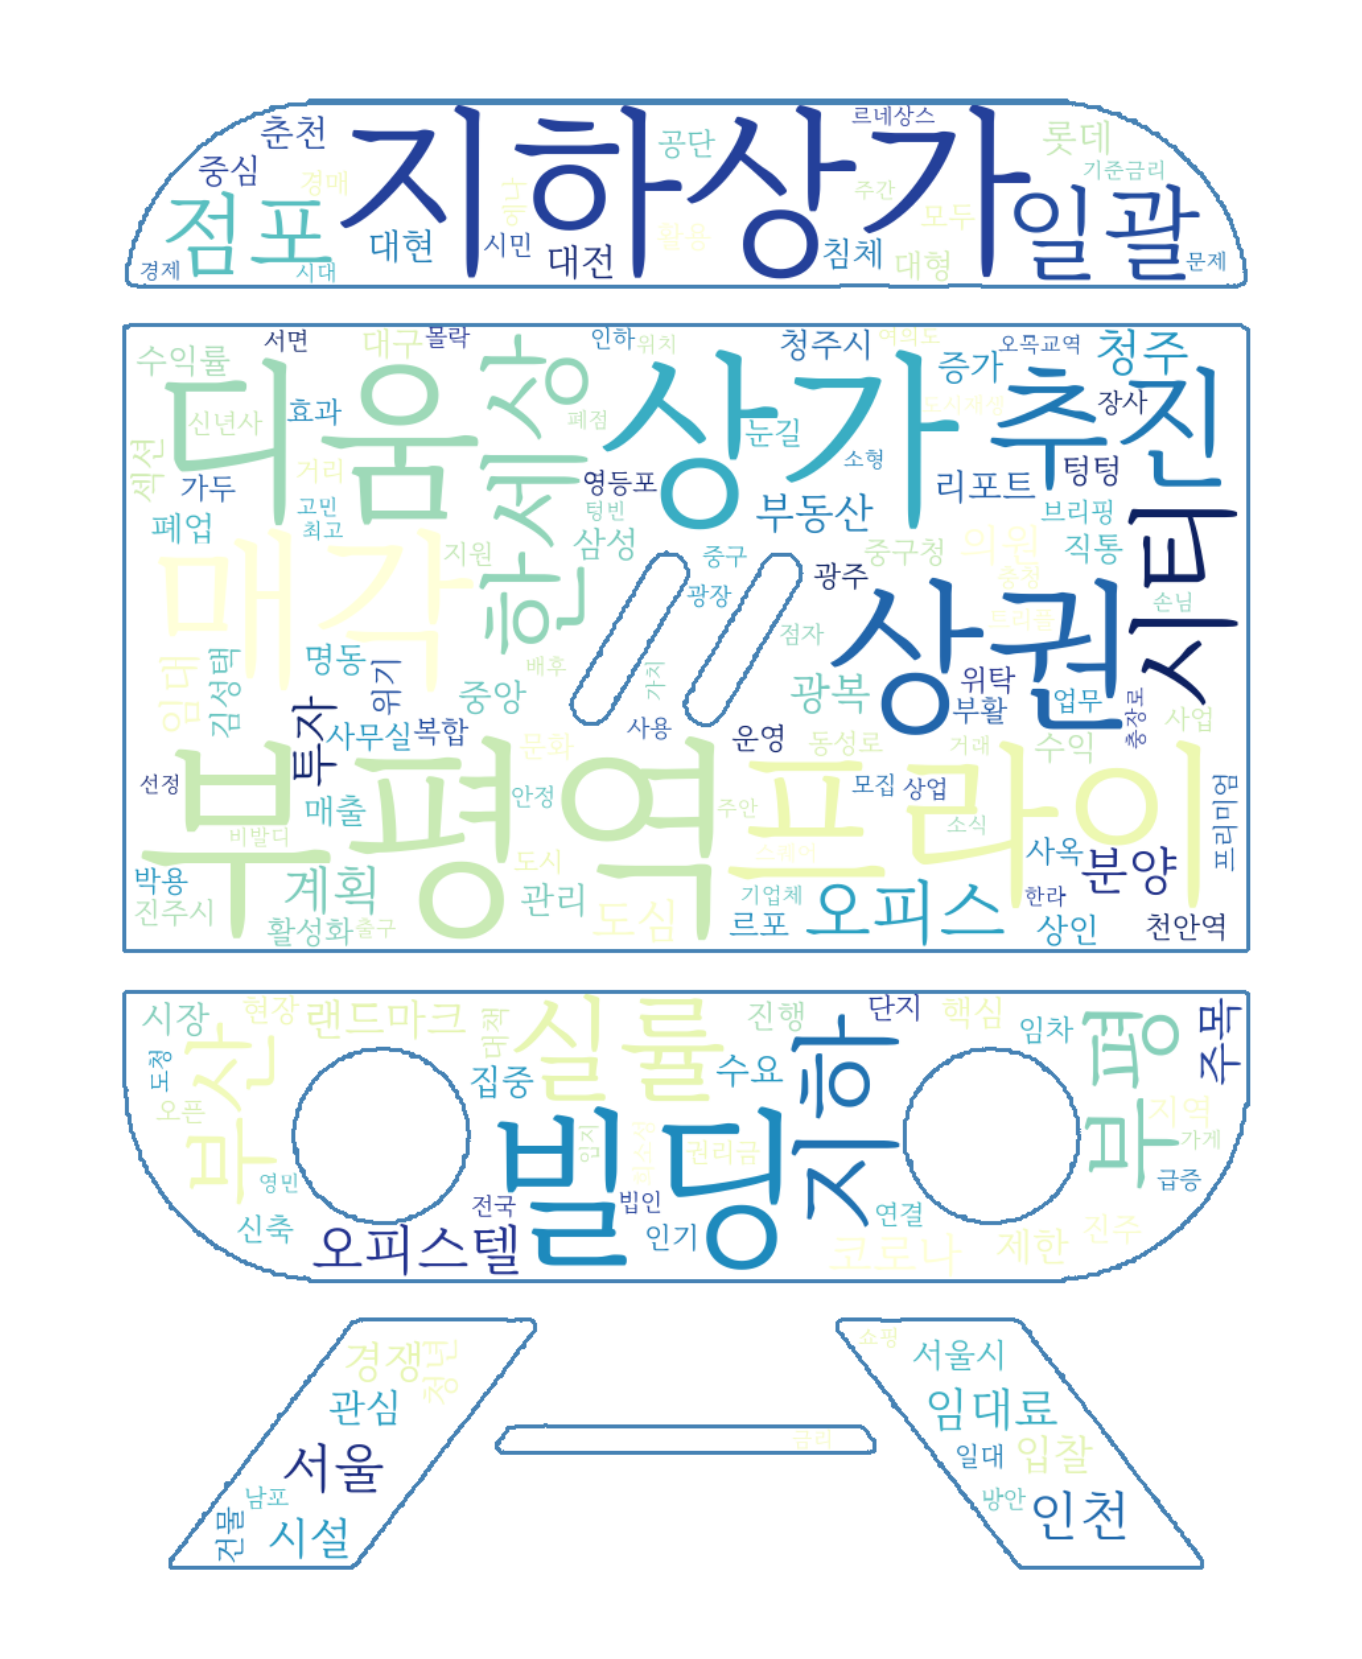

In [294]:
# 워드클라우드 출력
# 그림 티가 안나서 라인 추가
# 그림 안에 키워드가 적게 들어가서 키워드 양 80 -> 200 늘림
wc_empty = WordCloud(font_path=path, mask = mask2, contour_width=2, contour_color='steelblue', background_color='white', colormap ='YlGnBu')
cloud_empty = wc_empty.generate_from_frequencies(word_count2)

plt.figure(figsize=(40,15))
plt.imshow(cloud_empty, interpolation='bilinear')
plt.axis('off')
plt.show()
